# Jupyter Notebooks: A quick tutorial

### Markdown

All the text in this Jupyter Notebook is written in Markdown; we briefly talked about Markdown during the `git` tutorial, but it's a plain-text language that allows for fancy HTML rendering.

It allows you to **bold** text, to *italicize* it, and to make lists:

1. This
2. is
3. a 
4. list

all using plain text (i.e., not Microsoft Word or Google Docs). If you've ever used `RMarkdown`, then you might be familiar with some of the basics. Jupyter Notebooks will happily render any and all Markdown text for you, which makes detailing the work you do in the Notebook easy and intuitive.

You can select that you want a Markdown cell by selecting the dropdown menu located in the top toolbar (it defaults to 'Code') and choosing 'Markdown.'

A great cheatsheet with the various Markdown options and syntax is available at [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) &mdash; you can use [http://bit.ly/1dQOfRK](http://bit.ly/1dQOfRK) if you'd prefer a bit.ly link.

## Getting started (with Python)

We're going to play around with Python a little bit at first. The thing to remember here is that you don't need to know what these commands are doing. The goal here is to demonstrate how Jupyter Notebooks work -- the general structure and function of them -- to understand how they can be useful for you:

We'll start off with some default import for our Python code. This is just to get us started!

In [1]:
import numpy as np      # this loads a library for manipulating data
import pandas as pd     # this loads a library for handling datasets
import seaborn as sns   # this loads a library for making plots
sns.set(style='white')  # this says we want an extra-pretty plotting style

In order to get our plots to show up in the notebook (rather than as pop-ups in new windows), we need to use a little magic (that's what it's called!) command:

In [2]:
%matplotlib inline

Then, let's load up the iris dataset &mdash; this is a classic dataset that is used in a variety of fields. We're going to read in a CSV file (hosted on-line):

In [3]:
iris = pd.read_csv('http://bit.ly/2oKcw7S')  # read the CSV file in and assign it to a variable
iris.head()                                  # invoke the "head" command to look at the first few entries

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


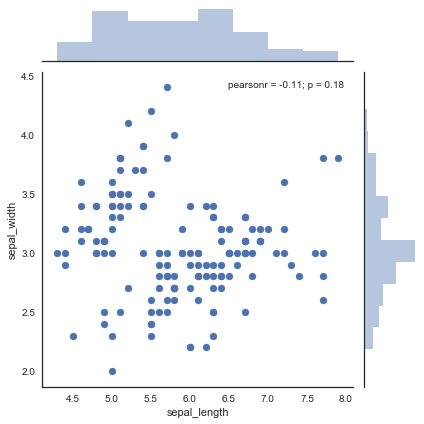

In [4]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris);  # make a plot comparing sepal_length and sepal_width

## Moving to R

We can also go back and forth between `python` and `R`. 

Why would you want this, you ask? Well, `R` is *the* program for statistics, but I would argue `python` modules are more diverse and better at heavy computational analyses. What if you want to do both, shuffling your data back and forth between `python` and `R`?

First, let's see how we can run commands (that we would normally run in the terminal!) from a notebook:

In [5]:
!conda install -y rpy2

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /Users/rossmarkello/anaconda3:

The following packages will be UPDATED:

    conda: 4.3.16-py35_0 --> 4.3.18-py35_0

conda-4.3.18-p 100% |################################| Time: 0:00:00   1.78 MB/s


Then, let's load the extension:

In [6]:
%load_ext rpy2.ipython

Then, let's make a little variable to send over to R. We're just going to make some random data and call it `x` and `y`.

In [7]:
for_R = pd.DataFrame(np.random.rand(100,2),  # make a random 100 x 2 array
                     columns=['x','y'])      # make the column names 'x' and 'y'
for_R.head()                                 # invoke the "head" command to look at the first few entries

,x,y
0,0.766013,0.925484
1,0.030446,0.089470
2,0.770835,0.783407
3,0.875317,0.394023
4,0.492833,0.042530


Now, let's do some `R`! We do this with the magic command `%%R`, which tells our Jupyter Notebook that everything in the cell should be interpreted as `R` code. 

We also use the argument `-i for_R` to say that we want our variable `for_R` to be sent to the `R` environment.

We'll just do a basic plot:

/Users/rossmarkello/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


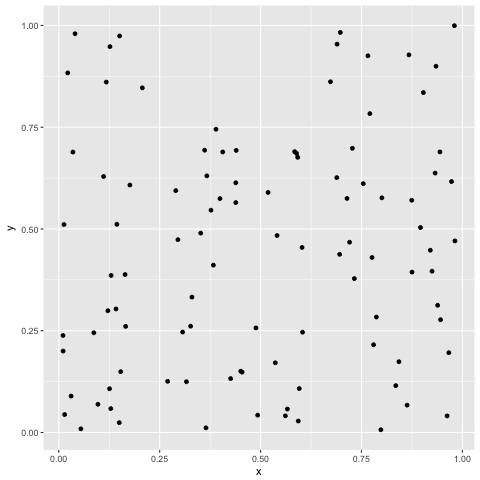

In [8]:
%%R -i for_R -o my_output
my_output <- c(1,2,3)
require(ggplot2)         # load the ggplot2 library
qplot(x, y, data=for_R)  # make a scatter plot

In [9]:
my_output

array([ 1.,  2.,  3.])

In [10]:
%R head(for_R)

,x,y
0,0.766013,0.925484
1,0.030446,0.089470
2,0.770835,0.783407
3,0.875317,0.394023
4,0.492833,0.042530
5,0.126785,0.947893


You can see that the `R` plots are also displayed in-line to create a seamless flow between code, exposition, and graphics!

## Other languages!

Jupyter Notebooks aren't just confined to `R` and `python`, though:

### bash

In [11]:
%%bash
echo "Jupyter notebooks can render bash commands!"

for number in {1..5}; do 
    echo $number
done

Jupyter notebooks can render bash commands!
1
2
3
4
5


### HTML

In [12]:
%%HTML
<h4>And they can render HTML, too!</h4>
<br>
Which lets us insert pictures:
<img src="http://i.onionstatic.com/avclub/4287/59/16x9/960.jpg" height="400", width="400">

### $\LaTeX$

We can render $\LaTeX$ equations, if we want to be really pretty:

$$Y = \beta_1{X_1} + \beta_2{X_2} + \epsilon$$

To do so, we use the "Markdown" cell option and simply write the $\LaTeX$ math surrounded by \$ (for inline math) or \$$ (for newline math) on both sides.